In [2]:
suppressMessages(library(dplyr))
suppressMessages(library(verification))
suppressMessages(library(class))
library(tree)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'verification' was built under R version 3.6.3"
Warning message:
"package 'fields' was built under R version 3.6.3"
Warning message:
"package 'spam' was built under R version 3.6.3"
Warning message:
"package 'dotCall64' was built under R version 3.6.3"
Warning message:
"package 'maps' was built under R version 3.6.3"
Warning message:
"package 'CircStats' was built under R version 3.6.3"
Warning message:
"package 'dtw' was built under R version 3.6.3"
Warning message:
"package 'proxy' was built under R version 3.6.3"
Warning message:
"package 'tree' was built under R version 3.6.3"


In [4]:
#setwd('6to Semestre')
#setwd('Temas Selectos de Matemáticas')
#setwd('Covid')
#setwd("C:/Users/sole-/Documents/Tecnologia/Sexto semestre/Temas compu")
cv=read.csv("200606COVID19MEXICO.csv",header=T)
cv <- na.omit(cv)
cv=cv%>%tbl_df()
cv=cv%>%filter(as.numeric(RESULTADO)<=1)
cv$FECHA_DEF = ifelse(cv$FECHA_DEF !="9999-99-99",1,0)

p = cv %>% filter(FECHA_DEF == 0) %>% summarize(p=n())  
num_negativo = p[[1]] #total de casos negativos
p = cv %>% filter(FECHA_DEF == 1) %>% summarize(p=n())
num_positivos = p[[1]] #numero de casos positivos

cv_covid_negativo = cv %>% filter(FECHA_DEF == 0)
cv_covid_positivo = cv %>% filter(FECHA_DEF == 1)
h = sample(1:num_negativo,num_positivos,replace = FALSE) #generamos numeros aleatorios
cv_int = cv_covid_negativo %>% slice(h)
cv <- bind_rows(cv_int,cv_covid_positivo)#50% que han muerto y 50% que estan vivos

h = sample(1:dim(cv)[1],dim(cv)[1],replace = FALSE)
cv = cv %>% slice(h)
cv
#str(cv)
cv$FECHA_DEF <- as.factor(cv$FECHA_DEF)
cv$ORIGEN <- as.factor(cv$ORIGEN)
cv$SECTOR <- as.factor(cv$SECTOR)
cv$ENTIDAD_UM<- as.factor(cv$ENTIDAD_UM)
cv$SEXO <- as.factor(cv$SEXO)
cv$ENTIDAD_NAC <- as.factor(cv$ENTIDAD_NAC)
cv$ENTIDAD_RES <- as.factor(cv$ENTIDAD_RES)
cv$MUNICIPIO_RES <- as.factor(cv$MUNICIPIO_RES)
cv$TIPO_PACIENTE <- as.factor(cv$TIPO_PACIENTE)
cv$INTUBADO <- as.factor(cv$INTUBADO )
cv$NEUMONIA  <- as.factor(cv$NEUMONIA )
cv$NACIONALIDAD <- as.factor(cv$NACIONALIDAD)
cv$EMBARAZO <- as.factor(cv$EMBARAZO)
cv$HABLA_LENGUA_INDI <- as.factor(cv$HABLA_LENGUA_INDIG)
cv$DIABETES <- as.factor(cv$DIABETES)
cv$EPOC <- as.factor(cv$EPOC)
cv$ASMA <- as.factor(cv$ASMA)
cv$INMUSUPR  <- as.factor(cv$INMUSUPR  )
cv$HIPERTENSION   <- as.factor(cv$HIPERTENSION  )
cv$OTRA_CON <- as.factor(cv$OTRA_COM)
cv$CARDIOVASCULAR <- as.factor(cv$CARDIOVASCULAR)
cv$OBESIDAD  <- as.factor(cv$OBESIDAD )
cv$RENAL_CRONICA  <- as.factor(cv$RENAL_CRONICA )
cv$TABAQUISMO <- as.factor(cv$TABAQUISMO)
cv$OTRO_CASO  <- as.factor(cv$OTRO_CASO  )
cv$RESULTADO    <- as.factor(cv$RESULTADO  )
cv$MIGRANTE <- as.factor(cv$MIGRANTE)
cv$UCI <- as.factor(cv$UCI)
cv$FECHA_DEF = as.factor(cv$FECHA_DEF)
attach(cv)
#str(cv)
index <- sample(1:dim(cv), (dim(cv)/2), replace = F)
Train <- cv[index,]
Test <- cv[-index,]


FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>
2020-06-06,0f12bb,2,12,9,2,9,9,7,2,...,2,2,1,2,2,1,99,MÃ©xico,99,1
2020-06-06,10975f,1,12,27,2,27,27,4,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
2020-06-06,0e6f59,1,12,9,2,21,9,7,2,...,2,2,2,2,2,1,99,MÃ©xico,99,1
2020-06-06,1ab58a,1,4,9,2,9,15,33,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2020-06-06,06ea4c,1,4,30,1,30,30,65,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
2020-06-06,10f464,2,12,19,2,19,19,26,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2020-06-06,12adfd,2,4,2,2,7,2,1,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2
2020-06-06,0dcbff,2,12,9,2,20,15,29,2,...,2,2,2,2,1,1,99,MÃ©xico,99,1
2020-06-06,12afe6,1,4,25,1,25,25,11,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2


The following objects are masked from cv (pos = 3):

    ASMA, CARDIOVASCULAR, DIABETES, EDAD, EMBARAZO, ENTIDAD_NAC,
    ENTIDAD_RES, ENTIDAD_UM, EPOC, FECHA_ACTUALIZACION, FECHA_DEF,
    FECHA_INGRESO, FECHA_SINTOMAS, HABLA_LENGUA_INDI,
    HABLA_LENGUA_INDIG, HIPERTENSION, ID_REGISTRO, INMUSUPR, INTUBADO,
    MIGRANTE, MUNICIPIO_RES, NACIONALIDAD, NEUMONIA, OBESIDAD, ORIGEN,
    OTRA_COM, OTRA_CON, OTRO_CASO, PAIS_NACIONALIDAD, PAIS_ORIGEN,
    RENAL_CRONICA, RESULTADO, SECTOR, SEXO, TABAQUISMO, TIPO_PACIENTE,
    UCI


Warning message in 1:dim(cv):
"numerical expression has 2 elements: only the first used"



Call:
glm(formula = FECHA_DEF ~ NEUMONIA + SEXO + EPOC + HIPERTENSION + 
    INMUSUPR + TABAQUISMO + CARDIOVASCULAR + DIABETES + ASMA + 
    OBESIDAD + RENAL_CRONICA + OTRO_CASO, family = "binomial", 
    data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0553  -0.6482  -0.3075   0.6918   2.4801  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       3.24270    0.29981  10.816  < 2e-16 ***
NEUMONIA2        -2.59491    0.04753 -54.598  < 2e-16 ***
SEXO2             0.50651    0.04728  10.713  < 2e-16 ***
EPOC2            -1.03381    0.14936  -6.922 4.46e-12 ***
EPOC98           -0.50299    0.85306  -0.590  0.55544    
HIPERTENSION2    -0.62901    0.05399 -11.652  < 2e-16 ***
HIPERTENSION98   -0.95352    0.70419  -1.354  0.17572    
INMUSUPR2        -0.37743    0.16285  -2.318  0.02047 *  
INMUSUPR98       -0.56131    0.76356  -0.735  0.46227    
TABAQUISMO2      -0.02214    0.08142  -0.272  0.78568    
TABAQUISMO98 

[1] 0.4

[1] 0.8151876

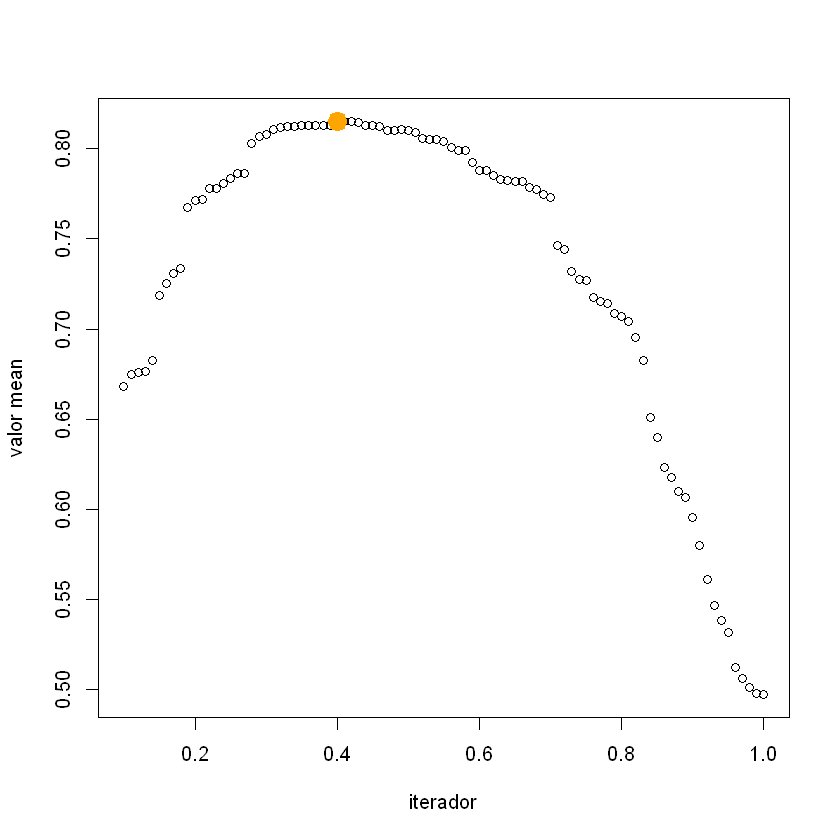

In [7]:
##########LOGISTIC######
  glm1<- glm(FECHA_DEF~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO ,family="binomial" ,data = Train)
  summary(glm1)
  yhat2<- predict(glm1, Test,type="response")
  #para elegir la mejor y evaluamos los posibles valores, desde 0.1 hasta 1 y vemos cual es el mean menor 
  #se repite 91 veces 
  size=1
  val_mean <- rep(0,91)
  for(i in seq(0.1,1,by=0.01)){
    y=as.integer(yhat2>i)
    y=ifelse(y =="0",0,1)
    val_mean[size]=mean(y == Test$FECHA_DEF)
    size=size+1
  }
  size=2
  lugar=1
  mejor=val_mean[lugar]
  for(i in seq(0.11,1,by=0.01)){
    if(val_mean[size]>mejor){
      mejor=val_mean[size]
      b=i
      lugar=size
    }
    size=size+1
  }
  y=seq(0.1,1,by=0.01)
  plot(y,val_mean,xlab = "iterador", ylab = "valor mean")
  points(b, val_mean[lugar],  col = "orange", lwd = 10)
 ###valores elegidos
   b
  val_mean[lugar]

[1] 0.8125605

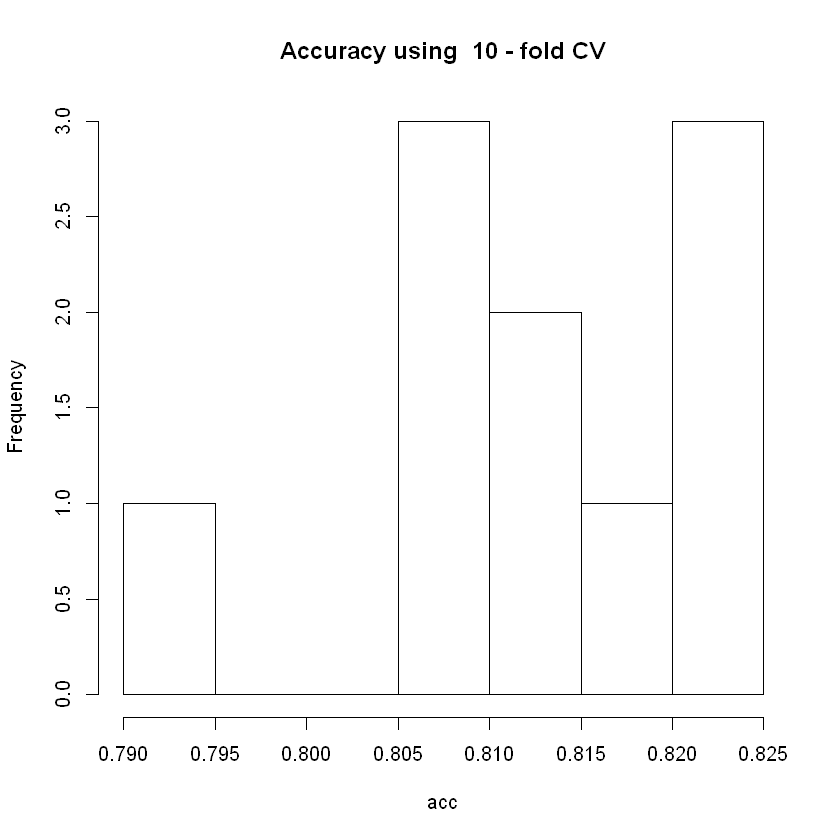

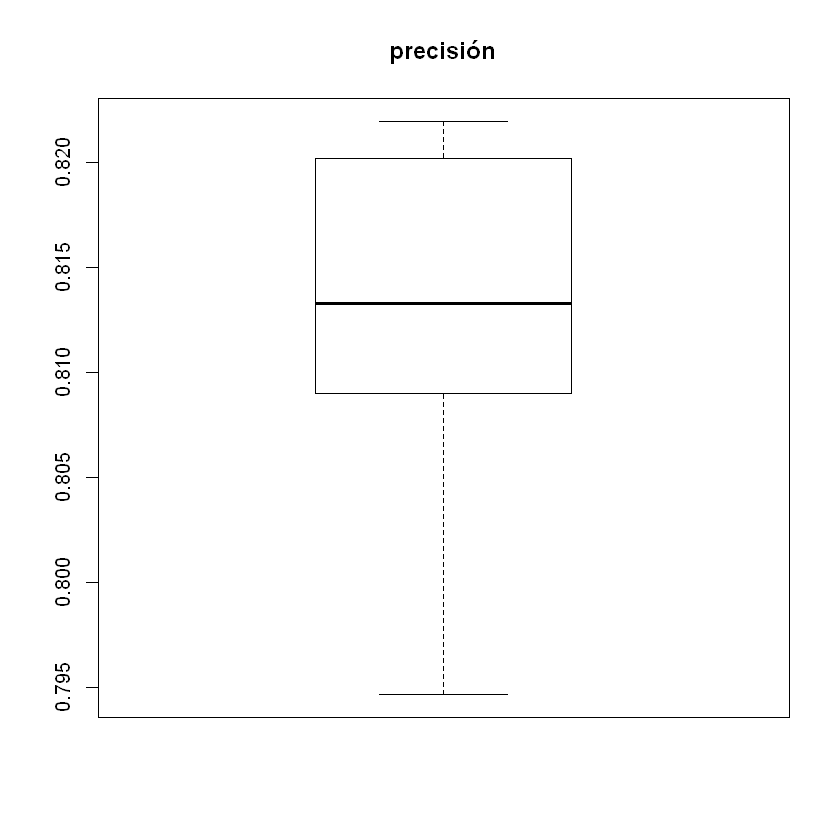

In [8]:
#################### k-folds glm
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = glm.c <-glm(FECHA_DEF~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO,family="binomial" ,data = train)
  
  y = test$FECHA_DEF
  yhat = predict(reg,test,type = "response")
  res = ifelse(yhat >b,1,0) #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="precisión")



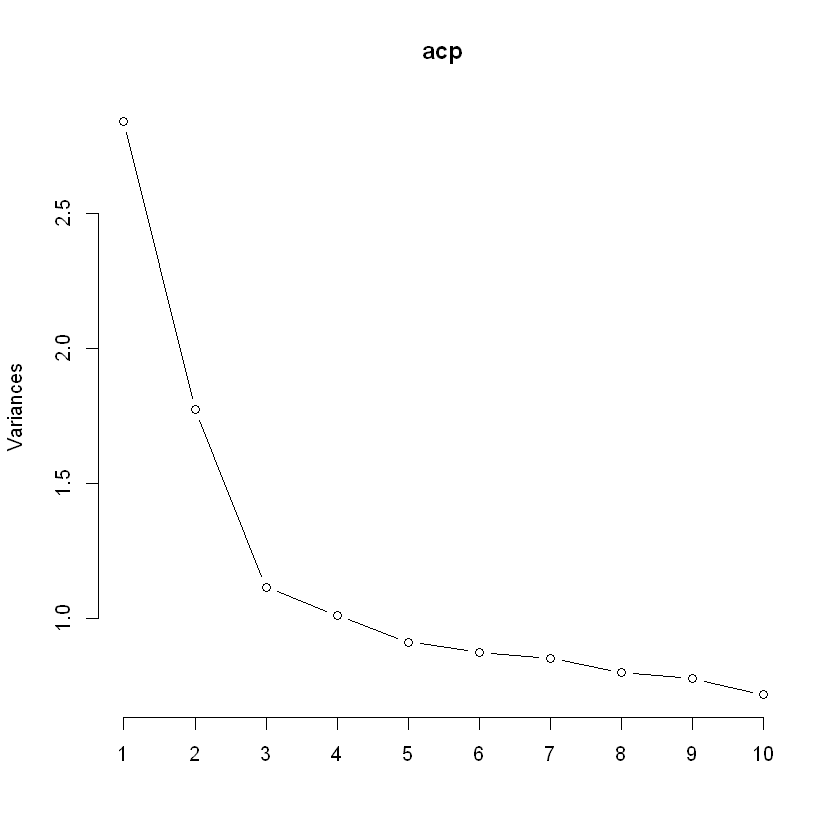

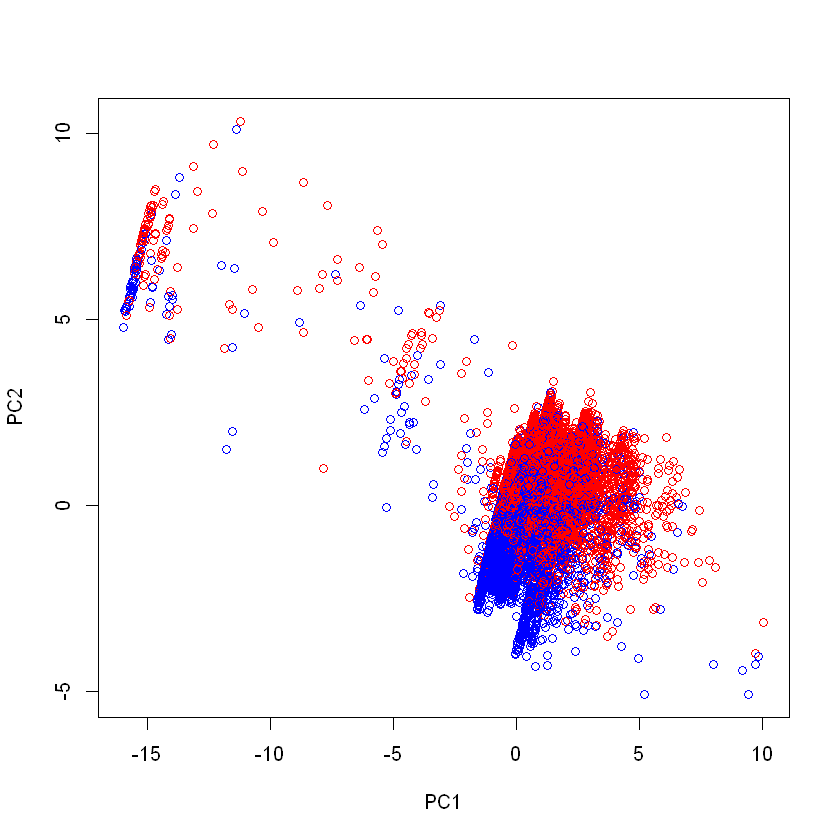

In [16]:
##################   PCA
covid = cv
UCI_list = covid$UCI
#def_list = covid$FECHA_DEF
def_list = covid$FECHA_DEF
covid <- as.data.frame(sapply(covid, as.numeric))
covid$FECHA_ACTUALIZACION <-NULL
covid$ID_REGISTRO <-NULL
covid$FECHA_INGRESO <-NULL
covid$FECHA_SINTOMAS <-NULL
covid$FECHA_DEF <- NULL
covid$PAIS_NACIONALIDAD <-NULL
covid$PAIS_ORIGEN <-NULL
covid$UCI <- NULL
covid$HABLA_LENGUA_INDIG <- NULL
covid$HABLA_LENGUA_INDI <- NULL
covid$MUNICIPIO_RES <- NULL
covid$MIGRANTE <- NULL
covid$ORIGEN <- NULL
covid$ENTIDAD_NAC <- NULL
covid$ENTIDAD_UM <- NULL
covid$ENTIDAD_RES <- NULL
covid$RESULTADO <- NULL
covid$SECTOR <- NULL
covid$OTRA_CON <- NULL
covid$TIPO_PACIENTE <- NULL
covid$NACIONALIDAD <- NULL
#covid$RENAL_CRONICA <- NULL
#covid$CARDIOVASCULAR <- NULL
covid$EMBARAZO <- NULL
#covid$TABAQUISMO <- NULL
covid$FECHA_DEF <- NULL
covid$INTUBADO <- NULL
#centrar las funcionalidades, usando el método prcm
acp <- prcomp(covid, center = TRUE, scale = TRUE) 
#normalizamos las variables, con center  cada variable sera restada de la media
#dividir por la desviación, estandarizamos las variables, para que no domine la varianza de uno
plot(acp, type = "l") 
plot(acp$x[,1],acp$x[,2],col=c("blue","red")[def_list],xlab="PC1",ylab="PC2")

In [9]:
#######LDA#####
lda1 <- lda(FECHA_DEF~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO,family="binomial" ,data = Train)
yhat1 <- predict(lda1, Test)$class
table(yhat1,Test$FECHA_DEF)
mean(yhat1 == Test$FECHA_DEF)

     
yhat1    0    1
    0 5396 1271
    1 1324 5520

[1] 0.8079343

[1] 0.8042708

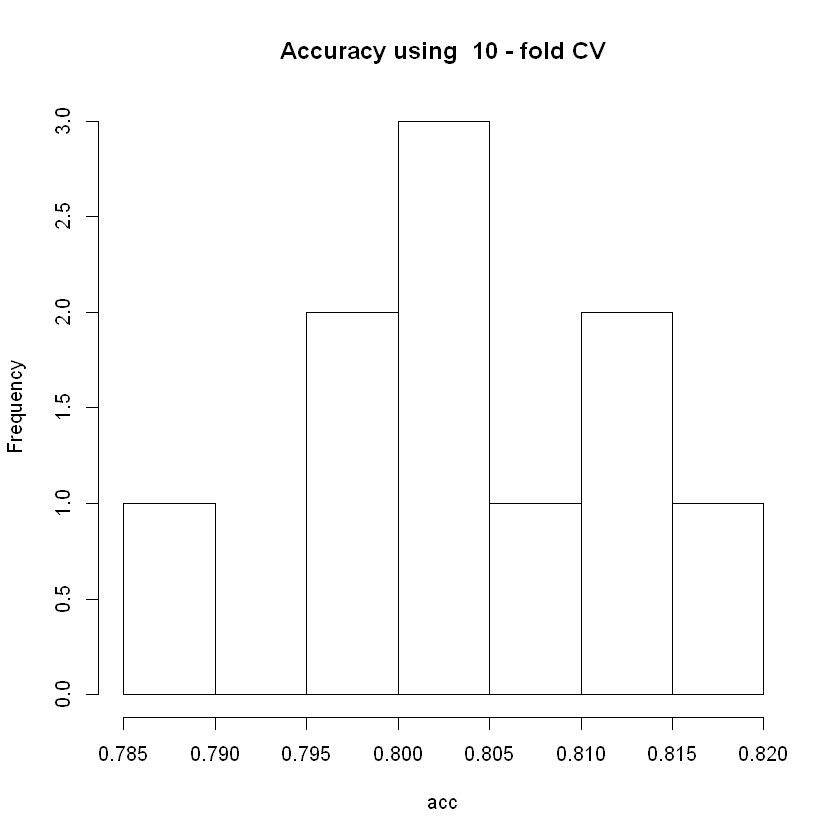

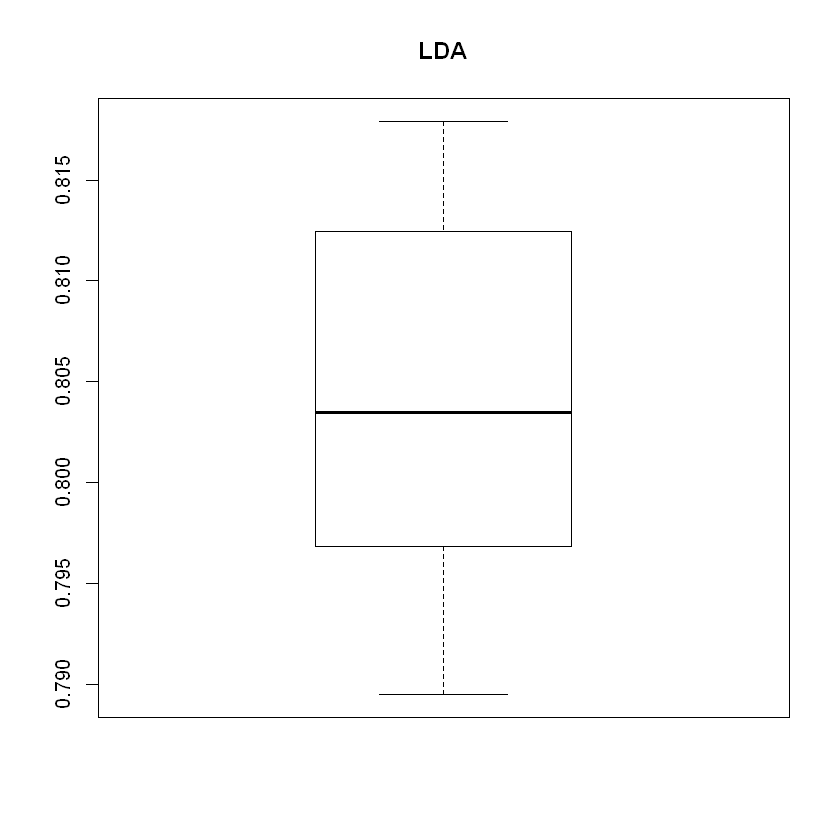

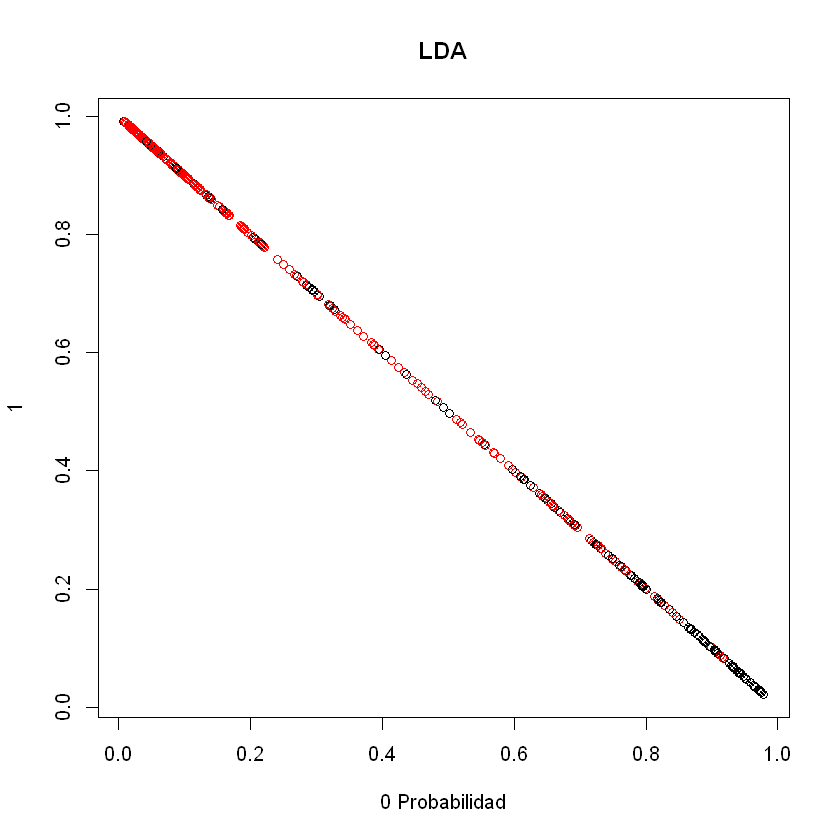

In [11]:
######kfolds lda
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = lda(FECHA_DEF~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO,family="binomial" ,data = train)
  
  y = test$FECHA_DEF
  res = predict(reg, test)$class #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="LDA",xlabel="Precisión")

y = as.factor(test$FECHA_DEF)
plot(predict(reg, test)$posterior,col=c(y),main="LDA",xlab="0 Probabilidad")

[1] "la mejor k fue: "


[1] 12

[1] 0.838872

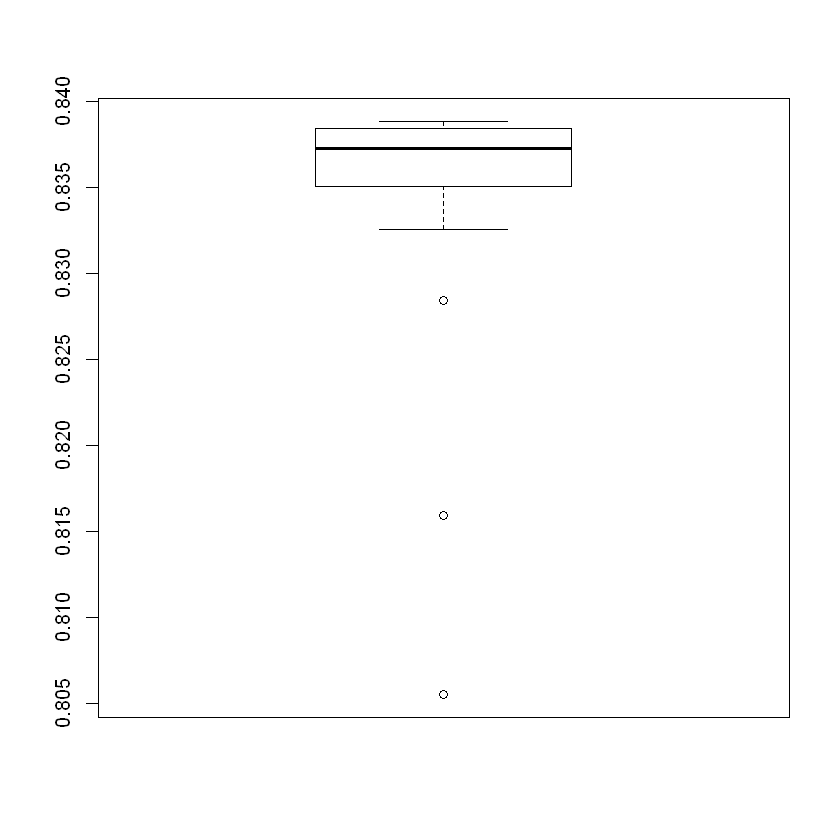

In [12]:
#############KNN#####
knn_val <- rep(1:20)
end= nrow(cv_covid_positivo)#numero de valores
mayor=0
for(n in 1:20){
  knn.pred <- knn(cbind(Train$SEXO,Train$NEUMONIA,Train$OBESIDAD,Train$HIPERTENSION,Train$DIABETES,
                        Train$EDAD,Train$CARDIOVASCULAR,Train$UCI,Train$EPOC,Train$OTRO_CASO,Train$OTRA_CON), 
                  cbind(Test$SEXO,Test$NEUMONIA,Test$OBESIDAD,Test$HIPERTENSION,Test$DIABETES,
                        Test$EDAD,Test$CARDIOVASCULAR,Test$UCI,Test$EPOC,Test$OTRO_CASO,Test$OTRA_CON), 
                  Train$FECHA_DEF, k=n)
  error= mean(Test$FECHA_DEF == knn.pred)
  knn_val[n]=error
  if(error>mayor){
    mayor=error
    k_best=n
  }
}
print("la mejor k fue: ")
k_best
mayor   
boxplot(knn_val)


Classification tree:
tree(formula = FECHA_DEF ~ NEUMONIA + SEXO + EPOC + HIPERTENSION + 
    INMUSUPR + TABAQUISMO + CARDIOVASCULAR + DIABETES + ASMA + 
    OBESIDAD + RENAL_CRONICA + OTRO_CASO, data = Train)
Variables actually used in tree construction:
[1] "NEUMONIA"  "OTRO_CASO" "DIABETES" 
Number of terminal nodes:  4 
Residual mean deviance:  0.9413 = 12710 / 13510 
Misclassification error rate: 0.1947 = 2631 / 13511 

         
tree.pred    0    1
        0 5216 1039
        1 1504 5752

[1] 0.811783

[1] "size"   "dev"    "k"      "method"

$size
[1] 4 2 1

$dev
[1] 2656 2847 6720

$k
[1] -Inf  108 3873

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

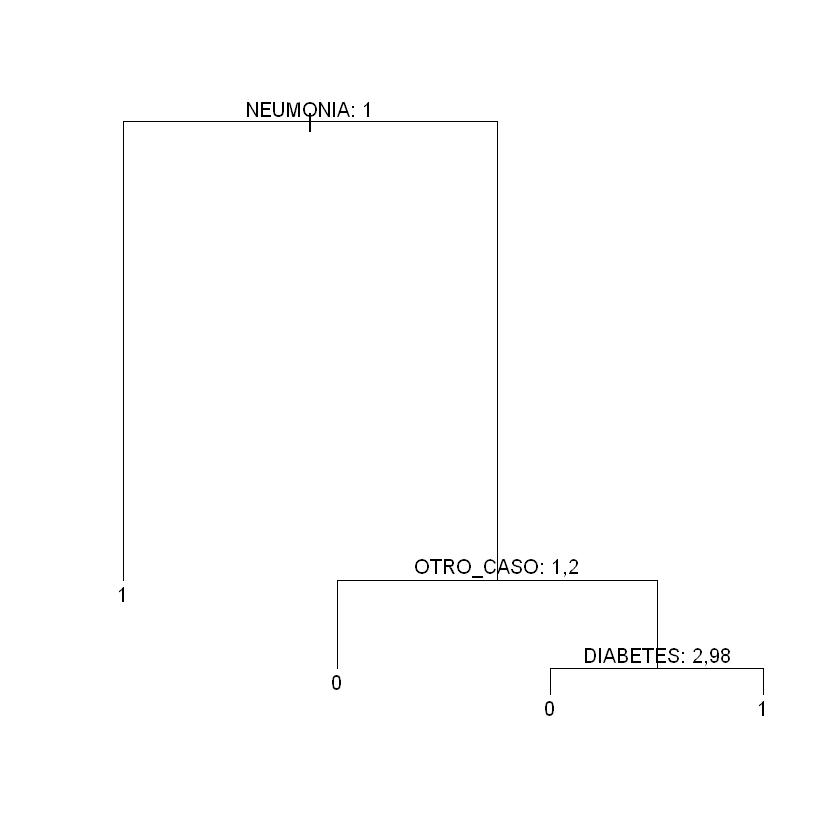

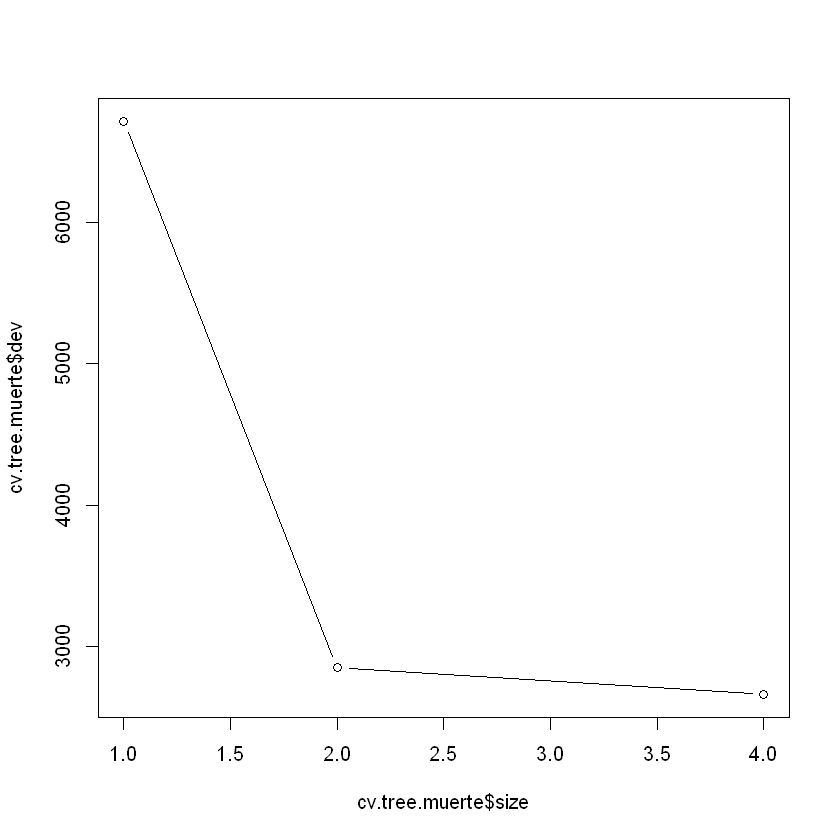

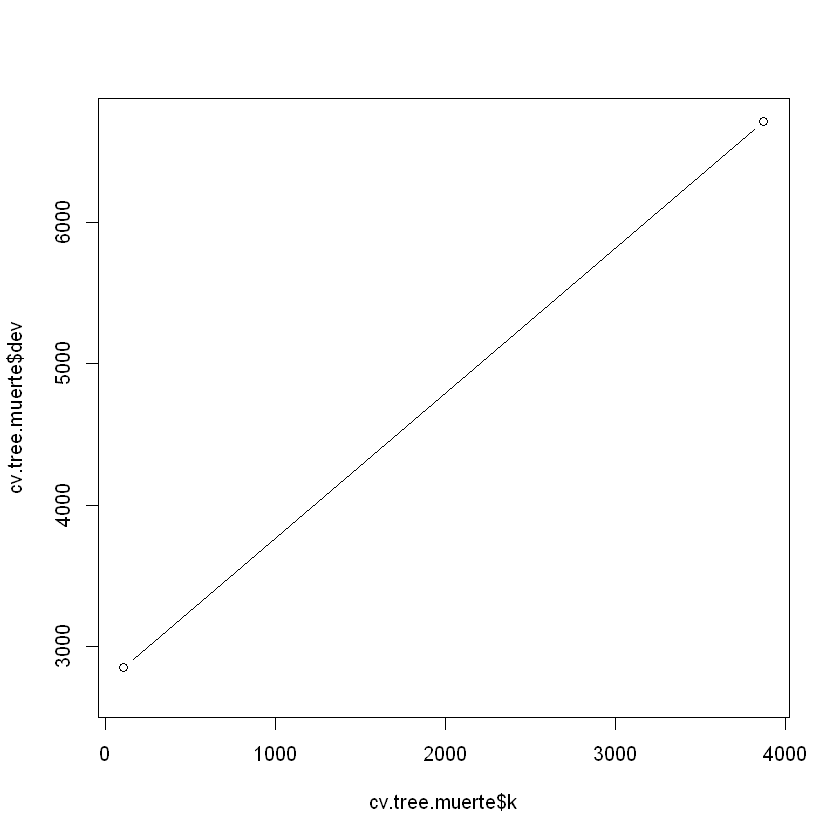

In [13]:
######## desicion tree####
tree.muerte = tree(FECHA_DEF~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO,data = Train)
summary(tree.muerte)
plot(tree.muerte)
text(tree.muerte, pretty=0)
tree.pred = predict(tree.muerte, Test, type="class")
table(tree.pred,Test$FECHA_DEF)
mean(tree.pred==Test$FECHA_DEF)

cv.tree.muerte = cv.tree(tree.muerte, FUN = prune.misclass)
names(cv.tree.muerte)
cv.tree.muerte
plot(cv.tree.muerte$size, cv.tree.muerte$dev,type="b")
plot(cv.tree.muerte$k,cv.tree.muerte$dev,type="b")


[1] 0.8085268

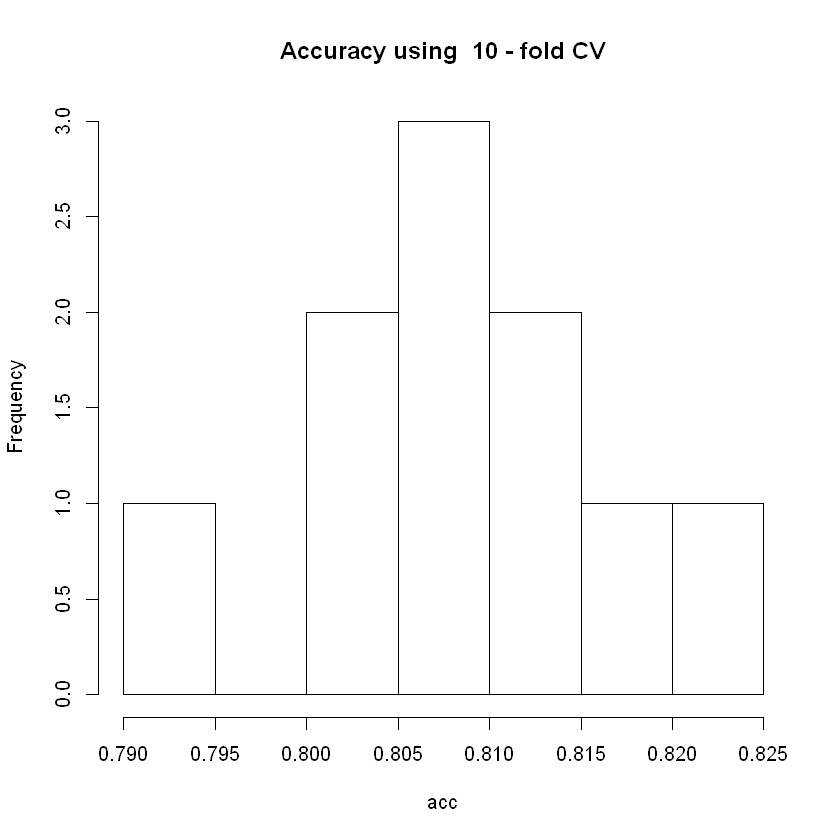

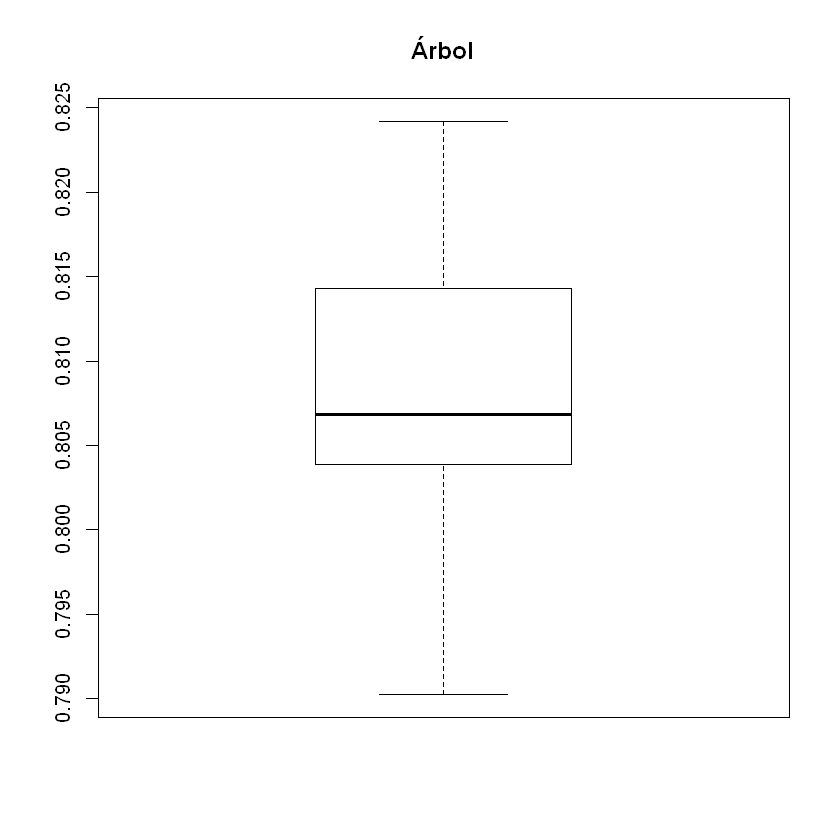

In [14]:
#######kfolds desicion tree
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg =tree(FECHA_DEF~ NEUMONIA+SEXO+EPOC+HIPERTENSION+INMUSUPR+TABAQUISMO+CARDIOVASCULAR+DIABETES+ASMA+OBESIDAD+RENAL_CRONICA+OTRO_CASO,data = train)
  
  y = test$FECHA_DEF
  res = predict(reg, test, type="class") #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="Árbol",xlabel="Precisión")